In [1]:
from planet_img_utils import *
from model_train_utils import *
import os
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

#### Masked images

In [2]:
path2data = '/home/akansh-i2sc/Desktop/Project/detect-car-LR/data/data_parking_masked/'
os.listdir(path2data)

paths = []
for i in os.listdir(path2data):
    for j in os.listdir(path2data+i):
        img_path = path2data+i+'/'+j+'/**/*.tif'
        paths.append(img_path)

In [3]:
all_img_paths = []
for i in os.listdir(path2data):
    for j in os.listdir(path2data+i):
        img_path = path2data+i+'/'+j+'/**/*.tif'
        clean_1 = clean_data_by_size(img_path)
        clean_2 = clean_data_by_black_pixels(clean_1)
        clean_3 = clean_data_by_white_pixels(clean_2)
        all_img_paths.extend(clean_3)

Initial size of dataset 500
Most common size of the dataset (4, 59, 45)
Final size of dataset(after removing faulty size images) 500
Final size of dataset(after removing faulty black pixels in images) 250
Final size of dataset(after removing faulty white pixels in images) 237
Initial size of dataset 500
Most common size of the dataset (4, 148, 167)
Final size of dataset(after removing faulty size images) 500
Final size of dataset(after removing faulty black pixels in images) 476
Final size of dataset(after removing faulty white pixels in images) 438
Initial size of dataset 500
Most common size of the dataset (4, 73, 49)
Final size of dataset(after removing faulty size images) 500
Final size of dataset(after removing faulty black pixels in images) 495
Final size of dataset(after removing faulty white pixels in images) 466
Initial size of dataset 500
Most common size of the dataset (4, 52, 58)
Final size of dataset(after removing faulty size images) 500
Final size of dataset(after removi

In [4]:
print("Total number of images before processing: ", len(glob(path2data+'**/*.tif', recursive=True)))
print("Total number of images after processing: ", len(all_img_paths))

Total number of images before processing:  15250
Total number of images after processing:  11313


In [5]:
masked_clean = [i for i in all_img_paths if 'Masked' in i]
square_clean = [i for i in all_img_paths if 'Planet' in i]

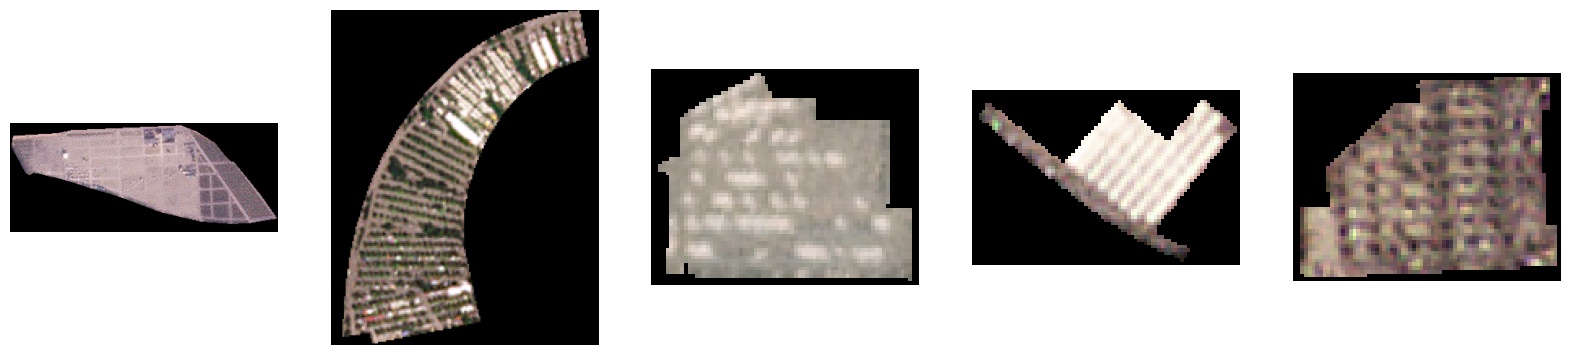

In [32]:
#plot 5 random images from masked_clean
plt.figure(figsize=(20,20))
for i in range(5):
    img = rioxarray.open_rasterio(masked_clean[np.random.randint(0,len(masked_clean))]).data[0:3].transpose(1, 2, 0)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis('off')

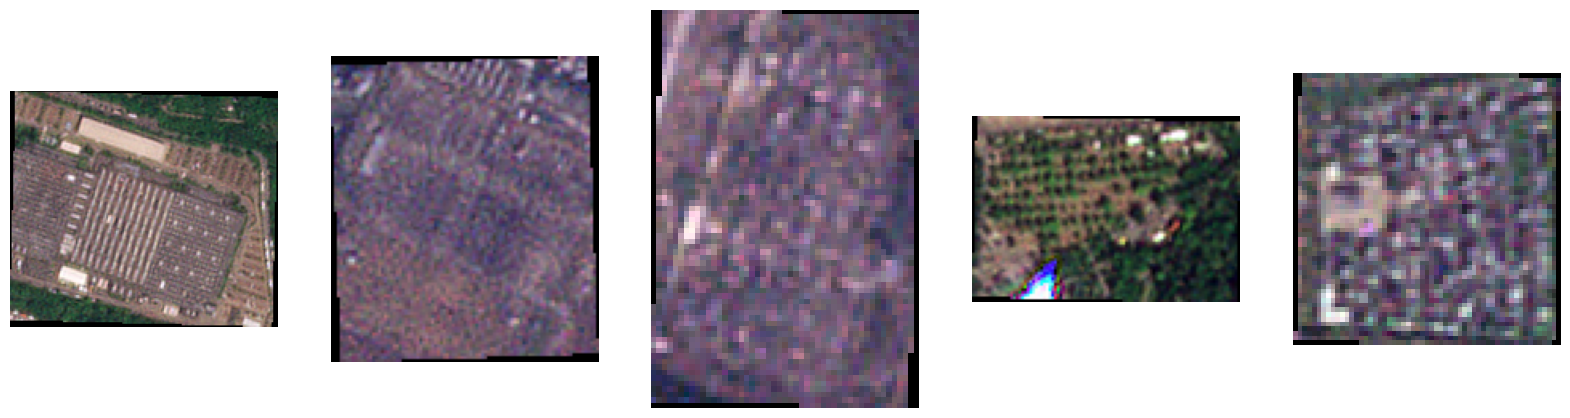

In [34]:
plt.figure(figsize=(20,20))
for i in range(5):
    img = rioxarray.open_rasterio(square_clean[np.random.randint(0,len(square_clean))]).data[0:3].transpose(1, 2, 0)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis('off')

#### Generate Labels

In [6]:
df_masked = label_csv(masked_clean)
df_square = label_csv(square_clean)

Class distribution in dataset: 0    4650
1     903
Name: label, dtype: int64
Class distribution in dataset: 0    4841
1     919
Name: label, dtype: int64


In [7]:
df_masked.head()

,image_path,day,label
0,/home/akansh-i2sc/Desktop/Project/detect-car-L...,Tuesday,0
1,/home/akansh-i2sc/Desktop/Project/detect-car-L...,Sunday,1
2,/home/akansh-i2sc/Desktop/Project/detect-car-L...,Wednesday,0
3,/home/akansh-i2sc/Desktop/Project/detect-car-L...,Friday,0
4,/home/akansh-i2sc/Desktop/Project/detect-car-L...,Thursday,0


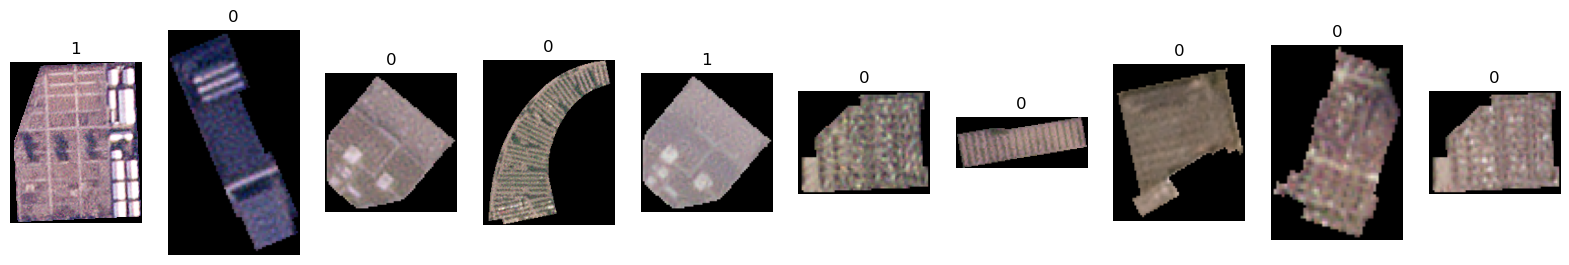

In [46]:
# plot random 10 images from df_masked with labels
plt.figure(figsize=(20,20))
for i in range(10):
    img = rioxarray.open_rasterio(df_masked['image_path'][np.random.randint(0,len(df_masked))]).data[0:3].transpose(1, 2, 0)
    plt.subplot(1,10,i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df_masked['label'][np.random.randint(0,len(df_masked))])

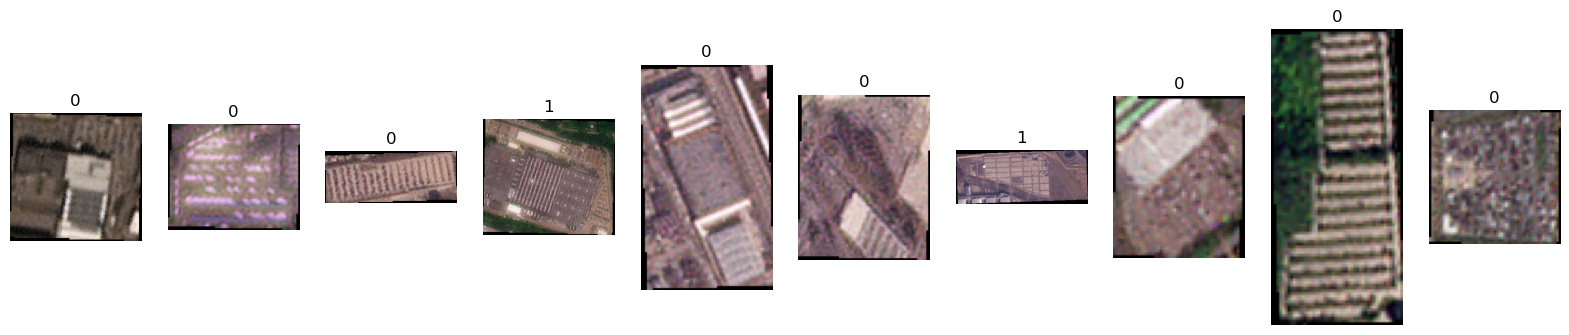

In [47]:
# plot random 10 images from df_square with labels
plt.figure(figsize=(20,20))
for i in range(10):
    img = rioxarray.open_rasterio(df_square['image_path'][np.random.randint(0,len(df_square))]).data[0:3].transpose(1, 2, 0)
    plt.subplot(1,10,i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df_square['label'][np.random.randint(0,len(df_square))])

- #TODO: Make a median image only based on Sunday images

In [55]:
Median_IMAGE_ARRAY = []
for i in os.listdir(path2data):
    for j in tqdm(os.listdir(path2data+i)):
        img_path = path2data+i+'/'+j+'/**/*.tif'
        median_img_arr, _ = create_median_image(glob(img_path))
        Median_IMAGE_ARRAY.append(median_img_arr)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

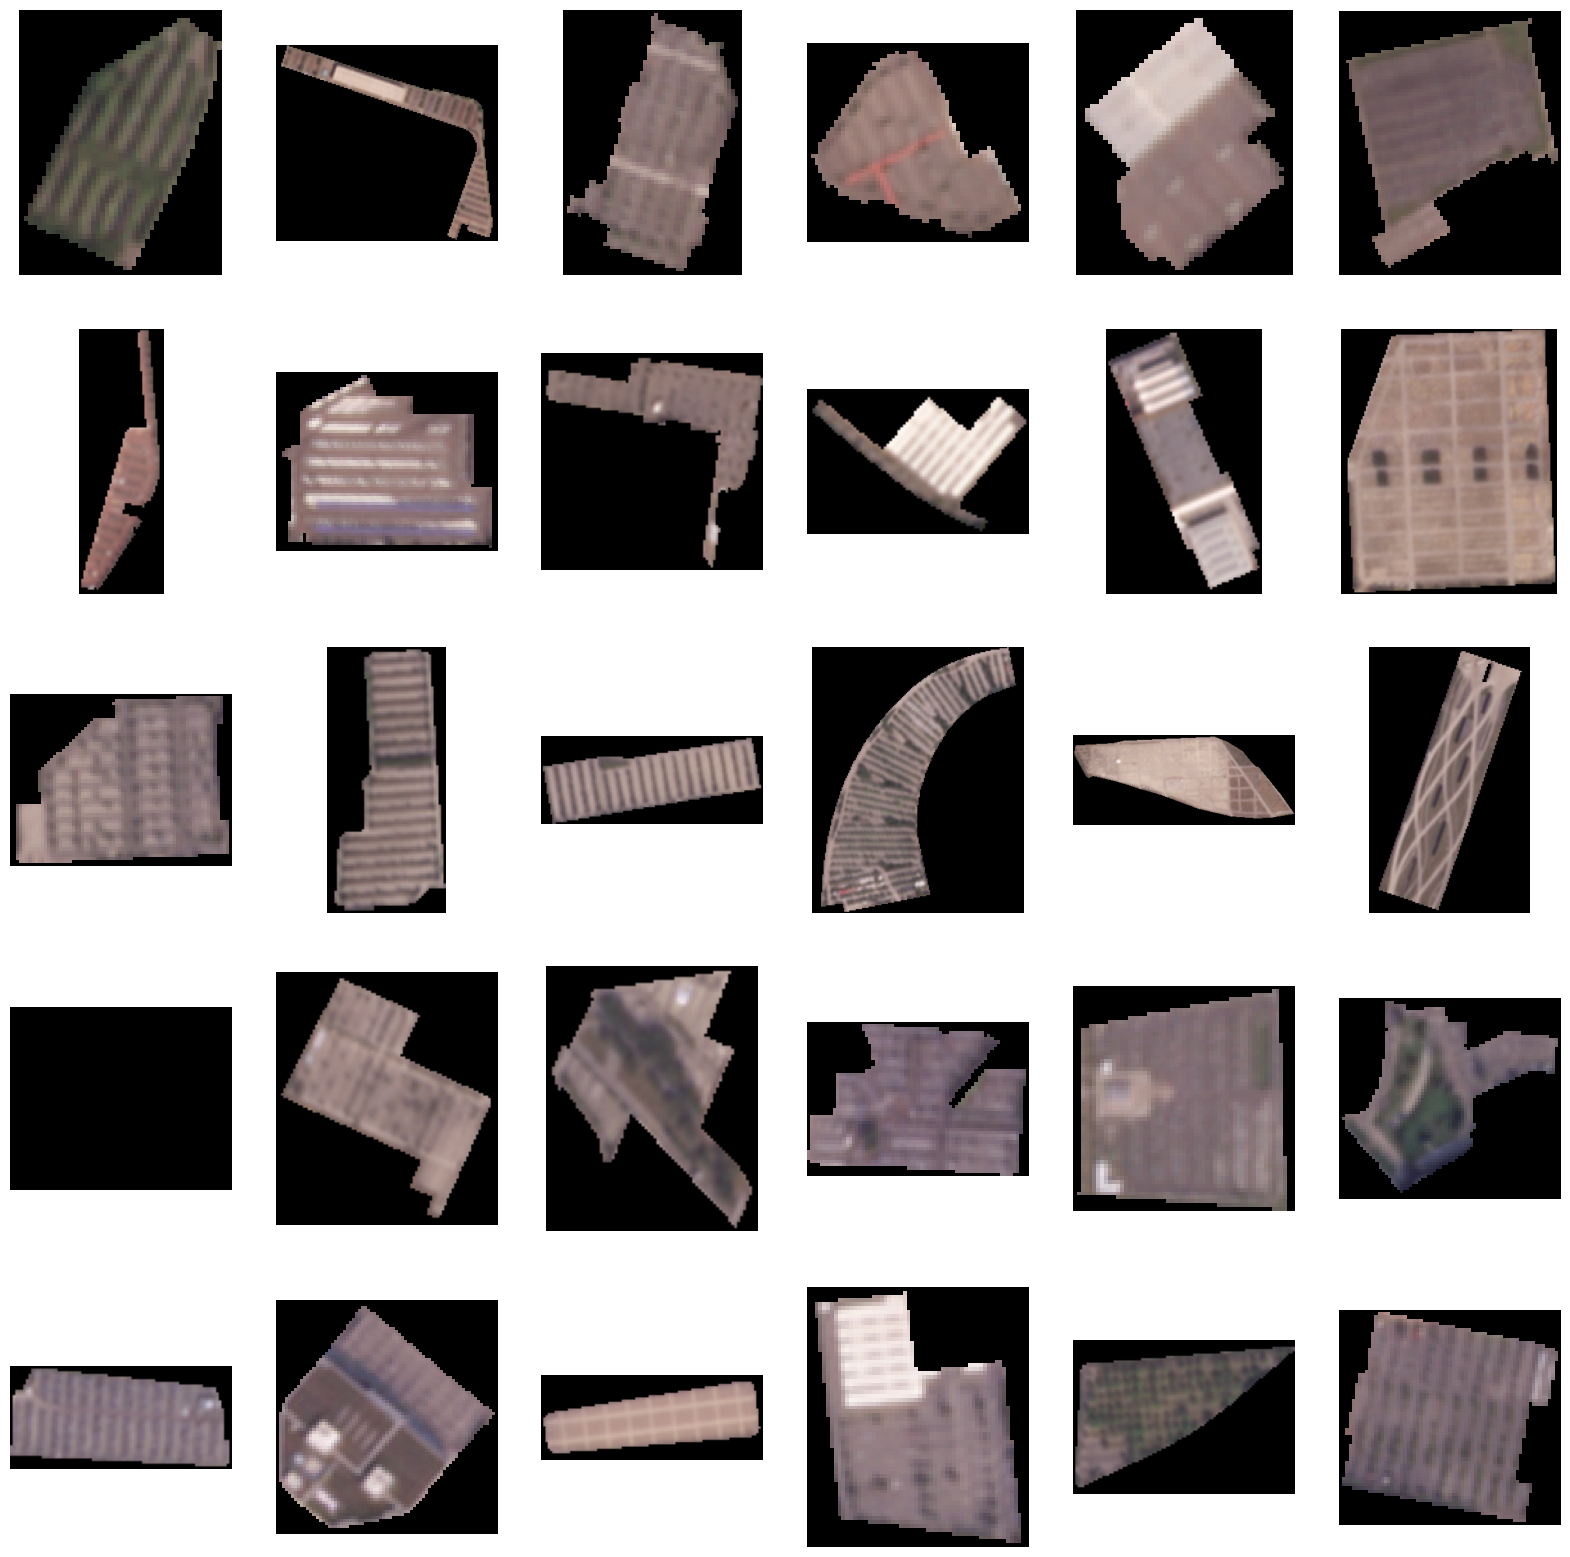

In [58]:
#plot all the median images from Median_IMAGE_ARRAY, only 5 images in a row
plt.figure(figsize=(20,20))
for i in range(len(Median_IMAGE_ARRAY)):
    plt.subplot(5,6,i+1)
    plt.imshow(Median_IMAGE_ARRAY[i])
    plt.axis('off')


#### Masked Images

In [8]:
#masked images
model_mask, train_loss_msk, train_accuracy_msk, train_auc_msk, test_loss_msk, test_accuracy_msk, test_auc_msk = train(df_masked, train_transform, test_transform, test_size = 0.1, num_epochs = 100, save_path='./models/masked_all_data')

Train size: (4997, 3)
Test size: (556, 3)
Train class distribution: 0    4184
1     813
Name: label, dtype: int64
Test class distribution: 0    466
1     90
Name: label, dtype: int64


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0/99
----------
Train Loss: 1.5400 Acc: 0.8231 AUC: 0.4989


  1%|          | 1/100 [00:34<56:32, 34.27s/it]

Test Loss: 1.5101 Acc: 0.8381 AUC: 0.5000
Saving the best model with accuracy 0.8381
Saving the best model with AUC 0.5000
Epoch 1/99
----------
Train Loss: 1.4053 Acc: 0.8341 AUC: 0.4986


  2%|▏         | 2/100 [01:07<55:09, 33.77s/it]

Test Loss: 1.6543 Acc: 0.8381 AUC: 0.5000
Epoch 2/99
----------
Train Loss: 1.3674 Acc: 0.8373 AUC: 0.5000


  3%|▎         | 3/100 [01:40<54:09, 33.50s/it]

Test Loss: 1.9370 Acc: 0.8381 AUC: 0.5000
Epoch 3/99
----------
Train Loss: 1.3574 Acc: 0.8373 AUC: 0.5000


  4%|▍         | 4/100 [02:14<53:37, 33.51s/it]

Test Loss: 1.5449 Acc: 0.8381 AUC: 0.5000
Epoch 4/99
----------
Train Loss: 1.3511 Acc: 0.8373 AUC: 0.5000


  5%|▌         | 5/100 [02:47<53:00, 33.48s/it]

Test Loss: 1.5675 Acc: 0.8381 AUC: 0.5000
Epoch 5/99
----------
Train Loss: 1.3513 Acc: 0.8373 AUC: 0.5000


  6%|▌         | 6/100 [03:21<52:42, 33.64s/it]

Test Loss: 1.4699 Acc: 0.8381 AUC: 0.5000
Epoch 6/99
----------
Train Loss: 1.3514 Acc: 0.8373 AUC: 0.5000


  7%|▋         | 7/100 [03:55<52:04, 33.59s/it]

Test Loss: 1.5666 Acc: 0.8381 AUC: 0.5000
Epoch 7/99
----------
Train Loss: 1.3454 Acc: 0.8373 AUC: 0.5000


  8%|▊         | 8/100 [04:28<51:08, 33.36s/it]

Test Loss: 1.4797 Acc: 0.8381 AUC: 0.5000
Epoch 8/99
----------
Train Loss: 1.3462 Acc: 0.8373 AUC: 0.5000


  9%|▉         | 9/100 [05:01<50:32, 33.33s/it]

Test Loss: 2.0310 Acc: 0.8381 AUC: 0.5000
Epoch 9/99
----------
Train Loss: 1.3398 Acc: 0.8373 AUC: 0.5000


 10%|█         | 10/100 [05:34<49:55, 33.28s/it]

Test Loss: 1.9019 Acc: 0.8381 AUC: 0.5000
Epoch 10/99
----------
Train Loss: 1.3434 Acc: 0.8373 AUC: 0.5000


 11%|█         | 11/100 [06:08<49:27, 33.34s/it]

Test Loss: 1.8545 Acc: 0.8381 AUC: 0.5000
Epoch 11/99
----------
Train Loss: 1.3414 Acc: 0.8373 AUC: 0.5000


 12%|█▏        | 12/100 [06:41<49:08, 33.50s/it]

Test Loss: 3.2387 Acc: 0.8381 AUC: 0.5000
Epoch 12/99
----------
Train Loss: 1.3429 Acc: 0.8373 AUC: 0.5000


 13%|█▎        | 13/100 [07:15<48:36, 33.53s/it]

Test Loss: 26.3848 Acc: 0.8381 AUC: 0.5000
Epoch 13/99
----------
Train Loss: 1.3428 Acc: 0.8373 AUC: 0.5000


 14%|█▍        | 14/100 [07:49<48:09, 33.59s/it]

Test Loss: 21.0011 Acc: 0.8381 AUC: 0.5000
Epoch 14/99
----------
Train Loss: 1.3412 Acc: 0.8373 AUC: 0.5000


 15%|█▌        | 15/100 [08:23<47:41, 33.66s/it]

Test Loss: 36.6274 Acc: 0.8381 AUC: 0.5000
Epoch 15/99
----------
Train Loss: 1.3453 Acc: 0.8373 AUC: 0.5000


 16%|█▌        | 16/100 [08:56<47:04, 33.63s/it]

Test Loss: 5.0200 Acc: 0.8381 AUC: 0.5000
Epoch 16/99
----------
Train Loss: 1.3422 Acc: 0.8373 AUC: 0.5000


 17%|█▋        | 17/100 [09:29<46:19, 33.49s/it]

Test Loss: 1.9091 Acc: 0.8381 AUC: 0.5000
Epoch 17/99
----------
Train Loss: 1.3417 Acc: 0.8373 AUC: 0.5000


 18%|█▊        | 18/100 [10:01<45:09, 33.04s/it]

Test Loss: 2.2924 Acc: 0.8381 AUC: 0.5000
Epoch 18/99
----------
Train Loss: 1.3420 Acc: 0.8373 AUC: 0.5000


 19%|█▉        | 19/100 [10:32<43:29, 32.21s/it]

Test Loss: 1.8056 Acc: 0.8381 AUC: 0.5000
Epoch 19/99
----------
Train Loss: 1.3413 Acc: 0.8373 AUC: 0.5000


 20%|██        | 20/100 [11:02<42:23, 31.79s/it]

Test Loss: 1.8126 Acc: 0.8381 AUC: 0.5000
Epoch 20/99
----------
Train Loss: 1.3410 Acc: 0.8373 AUC: 0.5000


 21%|██        | 21/100 [11:32<41:11, 31.28s/it]

Test Loss: 1.4599 Acc: 0.8381 AUC: 0.5000
Epoch 21/99
----------
Train Loss: 1.3393 Acc: 0.8373 AUC: 0.5000


 22%|██▏       | 22/100 [12:06<41:36, 32.00s/it]

Test Loss: 1.3698 Acc: 0.8381 AUC: 0.5000
Epoch 22/99
----------
Train Loss: 1.3406 Acc: 0.8373 AUC: 0.5000


 23%|██▎       | 23/100 [12:39<41:34, 32.40s/it]

Test Loss: 1.3755 Acc: 0.8381 AUC: 0.5000
Epoch 23/99
----------
Train Loss: 1.3383 Acc: 0.8373 AUC: 0.5000


 24%|██▍       | 24/100 [13:13<41:28, 32.74s/it]

Test Loss: 1.3630 Acc: 0.8381 AUC: 0.5000
Epoch 24/99
----------
Train Loss: 1.3362 Acc: 0.8373 AUC: 0.5000


 25%|██▌       | 25/100 [13:46<41:04, 32.86s/it]

Test Loss: 1.3583 Acc: 0.8381 AUC: 0.5000
Epoch 25/99
----------
Train Loss: 1.3386 Acc: 0.8373 AUC: 0.5000


 26%|██▌       | 26/100 [14:20<41:04, 33.30s/it]

Test Loss: 1.3890 Acc: 0.8381 AUC: 0.5000
Epoch 26/99
----------
Train Loss: 1.3393 Acc: 0.8373 AUC: 0.5000


 27%|██▋       | 27/100 [14:52<39:42, 32.64s/it]

Test Loss: 1.3737 Acc: 0.8381 AUC: 0.5000
Epoch 27/99
----------
Train Loss: 1.3379 Acc: 0.8373 AUC: 0.5000


 28%|██▊       | 28/100 [15:22<38:16, 31.90s/it]

Test Loss: 1.4948 Acc: 0.8381 AUC: 0.5000
Epoch 28/99
----------
Train Loss: 1.3368 Acc: 0.8373 AUC: 0.5000


 29%|██▉       | 29/100 [15:52<37:09, 31.40s/it]

Test Loss: 1.4162 Acc: 0.8381 AUC: 0.5000
Epoch 29/99
----------
Train Loss: 1.3346 Acc: 0.8373 AUC: 0.5000


 30%|███       | 30/100 [16:22<36:08, 30.98s/it]

Test Loss: 1.7244 Acc: 0.8381 AUC: 0.5000
Epoch 30/99
----------
Train Loss: 1.3266 Acc: 0.8373 AUC: 0.5000


 31%|███       | 31/100 [16:52<35:18, 30.71s/it]

Test Loss: 3.1646 Acc: 0.8381 AUC: 0.5000
Epoch 31/99
----------
Train Loss: 1.3195 Acc: 0.8373 AUC: 0.5000


 32%|███▏      | 32/100 [17:22<34:38, 30.57s/it]

Test Loss: 1.8556 Acc: 0.8381 AUC: 0.5000
Epoch 32/99
----------
Train Loss: 1.3202 Acc: 0.8373 AUC: 0.5000


 33%|███▎      | 33/100 [17:53<34:07, 30.56s/it]

Test Loss: 2.6288 Acc: 0.8381 AUC: 0.5000
Epoch 33/99
----------
Train Loss: 1.3174 Acc: 0.8391 AUC: 0.5055


 34%|███▍      | 34/100 [18:23<33:30, 30.46s/it]

Test Loss: 1.6393 Acc: 0.8381 AUC: 0.5000
Epoch 34/99
----------
Train Loss: 1.3151 Acc: 0.8413 AUC: 0.5143


 35%|███▌      | 35/100 [18:53<32:50, 30.31s/it]

Test Loss: 2.3821 Acc: 0.8381 AUC: 0.5000
Epoch 35/99
----------
Train Loss: 1.3160 Acc: 0.8401 AUC: 0.5126


 36%|███▌      | 36/100 [19:23<32:10, 30.17s/it]

Test Loss: 2.5247 Acc: 0.8381 AUC: 0.5000
Epoch 36/99
----------
Train Loss: 1.3058 Acc: 0.8421 AUC: 0.5177


 37%|███▋      | 37/100 [19:53<31:37, 30.12s/it]

Test Loss: 1.6925 Acc: 0.8381 AUC: 0.5000
Epoch 37/99
----------
Train Loss: 1.3014 Acc: 0.8411 AUC: 0.5161


 38%|███▊      | 38/100 [20:23<31:03, 30.06s/it]

Test Loss: 2.1247 Acc: 0.8381 AUC: 0.5000
Epoch 38/99
----------
Train Loss: 1.2992 Acc: 0.8415 AUC: 0.5164


 39%|███▉      | 39/100 [20:53<30:37, 30.12s/it]

Test Loss: 1.8295 Acc: 0.8381 AUC: 0.5000
Epoch 39/99
----------
Train Loss: 1.2980 Acc: 0.8411 AUC: 0.5156


 40%|████      | 40/100 [21:23<30:04, 30.08s/it]

Test Loss: 3.3249 Acc: 0.8381 AUC: 0.5000
Epoch 40/99
----------
Train Loss: 1.2958 Acc: 0.8419 AUC: 0.5176


 41%|████      | 41/100 [21:53<29:39, 30.15s/it]

Test Loss: 4.8005 Acc: 0.8381 AUC: 0.5000
Epoch 41/99
----------
Train Loss: 1.2927 Acc: 0.8427 AUC: 0.5211


 42%|████▏     | 42/100 [22:24<29:16, 30.29s/it]

Test Loss: 5.3864 Acc: 0.8381 AUC: 0.5000
Epoch 42/99
----------
Train Loss: 1.2924 Acc: 0.8425 AUC: 0.5185


 43%|████▎     | 43/100 [22:54<28:48, 30.33s/it]

Test Loss: 6.4361 Acc: 0.8381 AUC: 0.5000
Epoch 43/99
----------
Train Loss: 1.2948 Acc: 0.8427 AUC: 0.5186


 44%|████▍     | 44/100 [23:25<28:26, 30.48s/it]

Test Loss: 5.0286 Acc: 0.8381 AUC: 0.5000
Epoch 44/99
----------
Train Loss: 1.2916 Acc: 0.8423 AUC: 0.5174


 45%|████▌     | 45/100 [23:56<27:55, 30.47s/it]

Test Loss: 3.2728 Acc: 0.8381 AUC: 0.5000
Epoch 45/99
----------
Train Loss: 1.2893 Acc: 0.8421 AUC: 0.5187


 46%|████▌     | 46/100 [24:26<27:29, 30.55s/it]

Test Loss: 4.9352 Acc: 0.8381 AUC: 0.5000
Epoch 46/99
----------
Train Loss: 1.2860 Acc: 0.8435 AUC: 0.5215


 47%|████▋     | 47/100 [24:57<26:52, 30.42s/it]

Test Loss: 5.2873 Acc: 0.8381 AUC: 0.5000
Epoch 47/99
----------
Train Loss: 1.2838 Acc: 0.8413 AUC: 0.5173


 48%|████▊     | 48/100 [25:27<26:18, 30.36s/it]

Test Loss: 14.7921 Acc: 0.8381 AUC: 0.5000
Epoch 48/99
----------
Train Loss: 1.2877 Acc: 0.8423 AUC: 0.5198


 49%|████▉     | 49/100 [25:58<25:58, 30.56s/it]

Test Loss: 12.7432 Acc: 0.8381 AUC: 0.5000
Epoch 49/99
----------
Train Loss: 1.2804 Acc: 0.8427 AUC: 0.5196


 50%|█████     | 50/100 [26:28<25:18, 30.36s/it]

Test Loss: 13.1520 Acc: 0.8381 AUC: 0.5000
Epoch 50/99
----------
Train Loss: 1.2864 Acc: 0.8425 AUC: 0.5200


 51%|█████     | 51/100 [26:58<24:53, 30.47s/it]

Test Loss: 20.7951 Acc: 0.8381 AUC: 0.5000
Epoch 51/99
----------
Train Loss: 1.2869 Acc: 0.8431 AUC: 0.5213


 52%|█████▏    | 52/100 [27:29<24:19, 30.40s/it]

Test Loss: 9.5594 Acc: 0.8381 AUC: 0.5000
Epoch 52/99
----------
Train Loss: 1.2779 Acc: 0.8425 AUC: 0.5214


 53%|█████▎    | 53/100 [27:59<23:49, 30.41s/it]

Test Loss: 16.6295 Acc: 0.8381 AUC: 0.5000
Epoch 53/99
----------
Train Loss: 1.2811 Acc: 0.8417 AUC: 0.5180


 54%|█████▍    | 54/100 [28:29<23:18, 30.39s/it]

Test Loss: 14.2773 Acc: 0.8381 AUC: 0.5000
Epoch 54/99
----------
Train Loss: 1.2803 Acc: 0.8423 AUC: 0.5203


 55%|█████▌    | 55/100 [29:00<22:46, 30.36s/it]

Test Loss: 12.7963 Acc: 0.8381 AUC: 0.5000
Epoch 55/99
----------
Train Loss: 1.2795 Acc: 0.8435 AUC: 0.5201


 56%|█████▌    | 56/100 [29:30<22:13, 30.32s/it]

Test Loss: 18.6831 Acc: 0.8381 AUC: 0.5000
Epoch 56/99
----------
Train Loss: 1.2822 Acc: 0.8421 AUC: 0.5202


 57%|█████▋    | 57/100 [30:00<21:37, 30.17s/it]

Test Loss: 6.7467 Acc: 0.8381 AUC: 0.5000
Epoch 57/99
----------
Train Loss: 1.2732 Acc: 0.8433 AUC: 0.5219


 58%|█████▊    | 58/100 [30:30<21:07, 30.17s/it]

Test Loss: 52.3982 Acc: 0.8381 AUC: 0.5000
Epoch 58/99
----------
Train Loss: 1.2770 Acc: 0.8435 AUC: 0.5230


 59%|█████▉    | 59/100 [31:00<20:39, 30.24s/it]

Test Loss: 44.0336 Acc: 0.8381 AUC: 0.5000
Epoch 59/99
----------
Train Loss: 1.2734 Acc: 0.8437 AUC: 0.5236


 60%|██████    | 60/100 [31:30<20:09, 30.23s/it]

Test Loss: 10.4776 Acc: 0.8381 AUC: 0.5000
Epoch 60/99
----------
Train Loss: 1.2724 Acc: 0.8417 AUC: 0.5210


 61%|██████    | 61/100 [32:01<19:37, 30.20s/it]

Test Loss: 37.3214 Acc: 0.8381 AUC: 0.5000
Epoch 61/99
----------
Train Loss: 1.2749 Acc: 0.8419 AUC: 0.5196


 62%|██████▏   | 62/100 [32:31<19:08, 30.24s/it]

Test Loss: 7.7650 Acc: 0.8381 AUC: 0.5000
Epoch 62/99
----------
Train Loss: 1.2618 Acc: 0.8431 AUC: 0.5223


 63%|██████▎   | 63/100 [33:01<18:35, 30.14s/it]

Test Loss: 26.7672 Acc: 0.8381 AUC: 0.5000
Epoch 63/99
----------
Train Loss: 1.2682 Acc: 0.8431 AUC: 0.5228


 64%|██████▍   | 64/100 [33:31<18:02, 30.08s/it]

Test Loss: 14.9764 Acc: 0.8381 AUC: 0.5000
Epoch 64/99
----------
Train Loss: 1.2618 Acc: 0.8431 AUC: 0.5233


 65%|██████▌   | 65/100 [34:01<17:37, 30.20s/it]

Test Loss: 38.0287 Acc: 0.8381 AUC: 0.5000
Epoch 65/99
----------
Train Loss: 1.2585 Acc: 0.8427 AUC: 0.5240


 66%|██████▌   | 66/100 [34:32<17:09, 30.27s/it]

Test Loss: 50.2704 Acc: 0.8381 AUC: 0.5000
Epoch 66/99
----------
Train Loss: 1.2565 Acc: 0.8435 AUC: 0.5240


 67%|██████▋   | 67/100 [35:02<16:38, 30.27s/it]

Test Loss: 43.3759 Acc: 0.8381 AUC: 0.5000
Epoch 67/99
----------
Train Loss: 1.2651 Acc: 0.8433 AUC: 0.5254


 68%|██████▊   | 68/100 [35:32<16:07, 30.24s/it]

Test Loss: 12.6909 Acc: 0.8381 AUC: 0.5000
Epoch 68/99
----------
Train Loss: 1.2585 Acc: 0.8439 AUC: 0.5257


 69%|██████▉   | 69/100 [36:03<15:44, 30.47s/it]

Test Loss: 24.5813 Acc: 0.8381 AUC: 0.5000
Epoch 69/99
----------
Train Loss: 1.2544 Acc: 0.8439 AUC: 0.5262


 70%|███████   | 70/100 [36:34<15:19, 30.66s/it]

Test Loss: 46.4462 Acc: 0.8381 AUC: 0.5000
Epoch 70/99
----------
Train Loss: 1.2550 Acc: 0.8447 AUC: 0.5267


 71%|███████   | 71/100 [37:05<14:47, 30.61s/it]

Test Loss: 53.9420 Acc: 0.8381 AUC: 0.5000
Epoch 71/99
----------
Train Loss: 1.2462 Acc: 0.8429 AUC: 0.5237


 72%|███████▏  | 72/100 [37:35<14:14, 30.53s/it]

Test Loss: 29.3112 Acc: 0.8381 AUC: 0.5000
Epoch 72/99
----------
Train Loss: 1.2572 Acc: 0.8439 AUC: 0.5292


 73%|███████▎  | 73/100 [38:05<13:39, 30.34s/it]

Test Loss: 39.3991 Acc: 0.8381 AUC: 0.5000
Epoch 73/99
----------
Train Loss: 1.2553 Acc: 0.8431 AUC: 0.5233


 74%|███████▍  | 74/100 [38:35<13:05, 30.20s/it]

Test Loss: 18.3667 Acc: 0.8381 AUC: 0.5000
Epoch 74/99
----------
Train Loss: 1.2466 Acc: 0.8437 AUC: 0.5276


 75%|███████▌  | 75/100 [39:06<12:38, 30.36s/it]

Test Loss: 32.0357 Acc: 0.8381 AUC: 0.5000
Epoch 75/99
----------
Train Loss: 1.2566 Acc: 0.8437 AUC: 0.5281


 76%|███████▌  | 76/100 [39:36<12:07, 30.31s/it]

Test Loss: 14.7089 Acc: 0.8381 AUC: 0.5000
Epoch 76/99
----------
Train Loss: 1.2467 Acc: 0.8437 AUC: 0.5271


 77%|███████▋  | 77/100 [40:06<11:33, 30.14s/it]

Test Loss: 60.7190 Acc: 0.8381 AUC: 0.5000
Epoch 77/99
----------
Train Loss: 1.2421 Acc: 0.8435 AUC: 0.5280


 78%|███████▊  | 78/100 [40:36<11:03, 30.18s/it]

Test Loss: 51.6880 Acc: 0.8381 AUC: 0.5000
Epoch 78/99
----------
Train Loss: 1.2443 Acc: 0.8431 AUC: 0.5297


 79%|███████▉  | 79/100 [41:06<10:31, 30.06s/it]

Test Loss: 36.2710 Acc: 0.8381 AUC: 0.5000
Epoch 79/99
----------
Train Loss: 1.2391 Acc: 0.8437 AUC: 0.5316


 80%|████████  | 80/100 [41:35<09:58, 29.92s/it]

Test Loss: 38.5385 Acc: 0.8381 AUC: 0.5000
Epoch 80/99
----------
Train Loss: 1.2429 Acc: 0.8431 AUC: 0.5253


 81%|████████  | 81/100 [42:05<09:28, 29.92s/it]

Test Loss: 26.2114 Acc: 0.8381 AUC: 0.5000
Epoch 81/99
----------
Train Loss: 1.2395 Acc: 0.8441 AUC: 0.5269


 82%|████████▏ | 82/100 [42:36<09:03, 30.19s/it]

Test Loss: 61.4284 Acc: 0.8381 AUC: 0.5000
Epoch 82/99
----------
Train Loss: 1.2431 Acc: 0.8443 AUC: 0.5314


 83%|████████▎ | 83/100 [43:06<08:32, 30.14s/it]

Test Loss: 70.2487 Acc: 0.8381 AUC: 0.5000
Epoch 83/99
----------
Train Loss: 1.2412 Acc: 0.8437 AUC: 0.5321


 84%|████████▍ | 84/100 [43:36<08:03, 30.21s/it]

Test Loss: 57.2047 Acc: 0.8381 AUC: 0.5000
Epoch 84/99
----------
Train Loss: 1.2294 Acc: 0.8461 AUC: 0.5409


 85%|████████▌ | 85/100 [44:07<07:36, 30.41s/it]

Test Loss: 86.9379 Acc: 0.8363 AUC: 0.4989
Epoch 85/99
----------
Train Loss: 1.2321 Acc: 0.8433 AUC: 0.5318


 86%|████████▌ | 86/100 [44:38<07:05, 30.39s/it]

Test Loss: 48.0031 Acc: 0.8381 AUC: 0.5000
Epoch 86/99
----------
Train Loss: 1.2291 Acc: 0.8429 AUC: 0.5256


 87%|████████▋ | 87/100 [45:08<06:34, 30.38s/it]

Test Loss: 75.4299 Acc: 0.8381 AUC: 0.5000
Epoch 87/99
----------
Train Loss: 1.2256 Acc: 0.8437 AUC: 0.5331


 88%|████████▊ | 88/100 [45:38<06:03, 30.33s/it]

Test Loss: 118.0341 Acc: 0.8381 AUC: 0.5000
Epoch 88/99
----------
Train Loss: 1.2228 Acc: 0.8433 AUC: 0.5313


 89%|████████▉ | 89/100 [46:08<05:32, 30.27s/it]

Test Loss: 145.7287 Acc: 0.8381 AUC: 0.5000
Epoch 89/99
----------
Train Loss: 1.2133 Acc: 0.8471 AUC: 0.5420


 90%|█████████ | 90/100 [46:38<05:02, 30.22s/it]

Test Loss: 179.6117 Acc: 0.8327 AUC: 0.4968
Epoch 90/99
----------
Train Loss: 1.2229 Acc: 0.8447 AUC: 0.5381


 91%|█████████ | 91/100 [47:08<04:30, 30.08s/it]

Test Loss: 212.4785 Acc: 0.8381 AUC: 0.5000
Epoch 91/99
----------
Train Loss: 1.2258 Acc: 0.8421 AUC: 0.5331


 92%|█████████▏| 92/100 [47:38<03:59, 29.97s/it]

Test Loss: 159.2335 Acc: 0.8381 AUC: 0.5000
Epoch 92/99
----------
Train Loss: 1.2111 Acc: 0.8437 AUC: 0.5360


 93%|█████████▎| 93/100 [48:08<03:29, 29.98s/it]

Test Loss: 288.2143 Acc: 0.8291 AUC: 0.5081
Saving the best model with AUC 0.5081
Epoch 93/99
----------
Train Loss: 1.2057 Acc: 0.8437 AUC: 0.5395


 94%|█████████▍| 94/100 [48:38<02:59, 29.96s/it]

Test Loss: 200.5685 Acc: 0.8381 AUC: 0.5045
Epoch 94/99
----------
Train Loss: 1.2084 Acc: 0.8433 AUC: 0.5294


 95%|█████████▌| 95/100 [49:08<02:29, 29.96s/it]

Test Loss: 165.5242 Acc: 0.8094 AUC: 0.5232
Saving the best model with AUC 0.5232
Epoch 95/99
----------
Train Loss: 1.2001 Acc: 0.8449 AUC: 0.5422


 96%|█████████▌| 96/100 [49:38<01:59, 29.99s/it]

Test Loss: 501.0690 Acc: 0.8363 AUC: 0.4989
Epoch 96/99
----------
Train Loss: 1.1988 Acc: 0.8437 AUC: 0.5405


 97%|█████████▋| 97/100 [50:08<01:30, 30.05s/it]

Test Loss: 202.1250 Acc: 0.8273 AUC: 0.5205
Epoch 97/99
----------
Train Loss: 1.1992 Acc: 0.8467 AUC: 0.5507


 98%|█████████▊| 98/100 [50:39<01:00, 30.24s/it]

Test Loss: 480.1298 Acc: 0.8345 AUC: 0.5023
Epoch 98/99
----------
Train Loss: 1.1903 Acc: 0.8479 AUC: 0.5509


 99%|█████████▉| 99/100 [51:09<00:30, 30.22s/it]

Test Loss: 208.7401 Acc: 0.8309 AUC: 0.5136
Epoch 99/99
----------
Train Loss: 1.1848 Acc: 0.8489 AUC: 0.5570


100%|██████████| 100/100 [51:39<00:00, 31.00s/it]

Test Loss: 207.1228 Acc: 0.8094 AUC: 0.4918


In [9]:
#square images
model_square, train_loss_sqr, train_accuracy_sqr, train_auc_sqr, test_loss_sqr, test_accuracy_sqr, test_auc_sqr = train(df_square, train_transform, test_transform, test_size = 0.1, num_epochs = 100, save_path='./models/square_all_data')

Train size: (5184, 3)
Test size: (576, 3)
Train class distribution: 0    4357
1     827
Name: label, dtype: int64
Test class distribution: 0    484
1     92
Name: label, dtype: int64


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0/99
----------
Train Loss: 1.5008 Acc: 0.8275 AUC: 0.5046


  1%|          | 1/100 [00:33<55:27, 33.61s/it]

Test Loss: 3.2961 Acc: 0.8403 AUC: 0.5000
Saving the best model with accuracy 0.8403
Saving the best model with AUC 0.5000
Epoch 1/99
----------
Train Loss: 1.3780 Acc: 0.8374 AUC: 0.5001


  2%|▏         | 2/100 [01:06<54:22, 33.30s/it]

Test Loss: 1.8693 Acc: 0.8403 AUC: 0.5000
Epoch 2/99
----------
Train Loss: 1.3482 Acc: 0.8405 AUC: 0.5000


  3%|▎         | 3/100 [01:40<54:12, 33.53s/it]

Test Loss: 1.8896 Acc: 0.8403 AUC: 0.5000
Epoch 3/99
----------
Train Loss: 1.3388 Acc: 0.8405 AUC: 0.5000


  4%|▍         | 4/100 [02:13<53:17, 33.31s/it]

Test Loss: 1.8530 Acc: 0.8403 AUC: 0.5000
Epoch 4/99
----------
Train Loss: 1.3325 Acc: 0.8405 AUC: 0.5000


  5%|▌         | 5/100 [02:46<52:32, 33.18s/it]

Test Loss: 2.0044 Acc: 0.8403 AUC: 0.5000
Epoch 5/99
----------
Train Loss: 1.3384 Acc: 0.8405 AUC: 0.5000


  6%|▌         | 6/100 [03:19<52:02, 33.22s/it]

Test Loss: 1.3835 Acc: 0.8403 AUC: 0.5000
Epoch 6/99
----------
Train Loss: 1.3344 Acc: 0.8405 AUC: 0.5000


  7%|▋         | 7/100 [03:52<51:22, 33.15s/it]

Test Loss: 33.9074 Acc: 0.8403 AUC: 0.5000
Epoch 7/99
----------
Train Loss: 1.3287 Acc: 0.8405 AUC: 0.5000


  8%|▊         | 8/100 [04:25<50:27, 32.91s/it]

Test Loss: 16.4496 Acc: 0.8403 AUC: 0.5000
Epoch 8/99
----------
Train Loss: 1.3344 Acc: 0.8405 AUC: 0.5000


  9%|▉         | 9/100 [04:57<49:43, 32.79s/it]

Test Loss: 2.8405 Acc: 0.8403 AUC: 0.5000
Epoch 9/99
----------
Train Loss: 1.3313 Acc: 0.8405 AUC: 0.5000


 10%|█         | 10/100 [05:29<48:53, 32.60s/it]

Test Loss: 1.4402 Acc: 0.8403 AUC: 0.5000
Epoch 10/99
----------
Train Loss: 1.3290 Acc: 0.8405 AUC: 0.5000


 11%|█         | 11/100 [06:01<48:09, 32.47s/it]

Test Loss: 1.3881 Acc: 0.8403 AUC: 0.5000
Epoch 11/99
----------
Train Loss: 1.3282 Acc: 0.8405 AUC: 0.5000


 12%|█▏        | 12/100 [06:34<47:31, 32.40s/it]

Test Loss: 1.4326 Acc: 0.8403 AUC: 0.5000
Epoch 12/99
----------
Train Loss: 1.3257 Acc: 0.8405 AUC: 0.5000


 13%|█▎        | 13/100 [07:06<46:52, 32.33s/it]

Test Loss: 1.5609 Acc: 0.8403 AUC: 0.5000
Epoch 13/99
----------
Train Loss: 1.3263 Acc: 0.8405 AUC: 0.5000


 14%|█▍        | 14/100 [07:39<46:28, 32.43s/it]

Test Loss: 1.3853 Acc: 0.8403 AUC: 0.5000
Epoch 14/99
----------
Train Loss: 1.3232 Acc: 0.8405 AUC: 0.5000


 15%|█▌        | 15/100 [08:12<46:10, 32.59s/it]

Test Loss: 1.4040 Acc: 0.8403 AUC: 0.5000
Epoch 15/99
----------
Train Loss: 1.3220 Acc: 0.8405 AUC: 0.5000


 16%|█▌        | 16/100 [08:44<45:29, 32.50s/it]

Test Loss: 1.4531 Acc: 0.8403 AUC: 0.5000
Epoch 16/99
----------
Train Loss: 1.3273 Acc: 0.8405 AUC: 0.5000


 17%|█▋        | 17/100 [09:16<44:49, 32.41s/it]

Test Loss: 1.4607 Acc: 0.8403 AUC: 0.5000
Epoch 17/99
----------
Train Loss: 1.3283 Acc: 0.8405 AUC: 0.5000


 18%|█▊        | 18/100 [09:48<44:14, 32.37s/it]

Test Loss: 1.4424 Acc: 0.8403 AUC: 0.5000
Epoch 18/99
----------
Train Loss: 1.3259 Acc: 0.8405 AUC: 0.5000


 19%|█▉        | 19/100 [10:22<44:20, 32.85s/it]

Test Loss: 1.4466 Acc: 0.8403 AUC: 0.5000
Epoch 19/99
----------
Train Loss: 1.3261 Acc: 0.8405 AUC: 0.5000


 20%|██        | 20/100 [10:55<43:48, 32.86s/it]

Test Loss: 1.5861 Acc: 0.8403 AUC: 0.5000
Epoch 20/99
----------
Train Loss: 1.3243 Acc: 0.8405 AUC: 0.5000


 21%|██        | 21/100 [11:28<43:11, 32.80s/it]

Test Loss: 1.5633 Acc: 0.8403 AUC: 0.5000
Epoch 21/99
----------
Train Loss: 1.3210 Acc: 0.8405 AUC: 0.5000


 22%|██▏       | 22/100 [12:00<42:32, 32.73s/it]

Test Loss: 1.8543 Acc: 0.8403 AUC: 0.5000
Epoch 22/99
----------
Train Loss: 1.3203 Acc: 0.8405 AUC: 0.5000


 23%|██▎       | 23/100 [12:33<41:55, 32.67s/it]

Test Loss: 1.8941 Acc: 0.8403 AUC: 0.5000
Epoch 23/99
----------
Train Loss: 1.3229 Acc: 0.8405 AUC: 0.5000


 24%|██▍       | 24/100 [13:06<41:27, 32.73s/it]

Test Loss: 2.1262 Acc: 0.8403 AUC: 0.5000
Epoch 24/99
----------
Train Loss: 1.3165 Acc: 0.8405 AUC: 0.5000


 25%|██▌       | 25/100 [13:38<40:48, 32.65s/it]

Test Loss: 1.8206 Acc: 0.8403 AUC: 0.5000
Epoch 25/99
----------
Train Loss: 1.3208 Acc: 0.8405 AUC: 0.5000


 26%|██▌       | 26/100 [14:11<40:11, 32.59s/it]

Test Loss: 1.7751 Acc: 0.8403 AUC: 0.5000
Epoch 26/99
----------
Train Loss: 1.3231 Acc: 0.8405 AUC: 0.5000


 27%|██▋       | 27/100 [14:44<39:53, 32.79s/it]

Test Loss: 1.4555 Acc: 0.8403 AUC: 0.5000
Epoch 27/99
----------
Train Loss: 1.3213 Acc: 0.8405 AUC: 0.5000


 28%|██▊       | 28/100 [15:16<39:14, 32.70s/it]

Test Loss: 1.6176 Acc: 0.8403 AUC: 0.5000
Epoch 28/99
----------
Train Loss: 1.3234 Acc: 0.8405 AUC: 0.5000


 29%|██▉       | 29/100 [15:49<38:47, 32.79s/it]

Test Loss: 1.6315 Acc: 0.8403 AUC: 0.5000
Epoch 29/99
----------
Train Loss: 1.3213 Acc: 0.8405 AUC: 0.5000


 30%|███       | 30/100 [16:22<38:21, 32.87s/it]

Test Loss: 1.5519 Acc: 0.8403 AUC: 0.5000
Epoch 30/99
----------
Train Loss: 1.3176 Acc: 0.8405 AUC: 0.5000


 31%|███       | 31/100 [16:55<37:41, 32.78s/it]

Test Loss: 1.8022 Acc: 0.8403 AUC: 0.5000
Epoch 31/99
----------
Train Loss: 1.3176 Acc: 0.8405 AUC: 0.5000


 32%|███▏      | 32/100 [17:27<37:00, 32.65s/it]

Test Loss: 1.5913 Acc: 0.8403 AUC: 0.5000
Epoch 32/99
----------
Train Loss: 1.3178 Acc: 0.8405 AUC: 0.5000


 33%|███▎      | 33/100 [18:01<36:38, 32.81s/it]

Test Loss: 2.3223 Acc: 0.8403 AUC: 0.5000
Epoch 33/99
----------
Train Loss: 1.3150 Acc: 0.8405 AUC: 0.5000


 34%|███▍      | 34/100 [18:33<36:04, 32.79s/it]

Test Loss: 2.3998 Acc: 0.8403 AUC: 0.5000
Epoch 34/99
----------
Train Loss: 1.3169 Acc: 0.8405 AUC: 0.5000


 35%|███▌      | 35/100 [19:06<35:22, 32.65s/it]

Test Loss: 2.0011 Acc: 0.8403 AUC: 0.5000
Epoch 35/99
----------
Train Loss: 1.3170 Acc: 0.8405 AUC: 0.5000


 36%|███▌      | 36/100 [19:38<34:42, 32.54s/it]

Test Loss: 2.0614 Acc: 0.8403 AUC: 0.5000
Epoch 36/99
----------
Train Loss: 1.3129 Acc: 0.8405 AUC: 0.5000


 37%|███▋      | 37/100 [20:10<34:04, 32.46s/it]

Test Loss: 2.5415 Acc: 0.8403 AUC: 0.5000
Epoch 37/99
----------
Train Loss: 1.3124 Acc: 0.8405 AUC: 0.5000


 38%|███▊      | 38/100 [20:43<33:35, 32.51s/it]

Test Loss: 1.4869 Acc: 0.8403 AUC: 0.5000
Epoch 38/99
----------
Train Loss: 1.3023 Acc: 0.8405 AUC: 0.5000


 39%|███▉      | 39/100 [21:16<33:07, 32.58s/it]

Test Loss: 1.7688 Acc: 0.8403 AUC: 0.5000
Epoch 39/99
----------
Train Loss: 1.2979 Acc: 0.8405 AUC: 0.5000


 40%|████      | 40/100 [21:49<32:49, 32.82s/it]

Test Loss: 1.6575 Acc: 0.8403 AUC: 0.5000
Epoch 40/99
----------
Train Loss: 1.2946 Acc: 0.8405 AUC: 0.5000


 41%|████      | 41/100 [22:22<32:13, 32.77s/it]

Test Loss: 1.5562 Acc: 0.8403 AUC: 0.5000
Epoch 41/99
----------
Train Loss: 1.3004 Acc: 0.8405 AUC: 0.5000


 42%|████▏     | 42/100 [22:54<31:39, 32.75s/it]

Test Loss: 2.2620 Acc: 0.8403 AUC: 0.5000
Epoch 42/99
----------
Train Loss: 1.2893 Acc: 0.8405 AUC: 0.5000


 43%|████▎     | 43/100 [23:27<31:06, 32.74s/it]

Test Loss: 1.6141 Acc: 0.8403 AUC: 0.5000
Epoch 43/99
----------
Train Loss: 1.2886 Acc: 0.8405 AUC: 0.5000


 44%|████▍     | 44/100 [23:59<30:21, 32.53s/it]

Test Loss: 1.6682 Acc: 0.8403 AUC: 0.5000
Epoch 44/99
----------
Train Loss: 1.2840 Acc: 0.8438 AUC: 0.5108


 45%|████▌     | 45/100 [24:32<29:50, 32.56s/it]

Test Loss: 2.0487 Acc: 0.8403 AUC: 0.5000
Epoch 45/99
----------
Train Loss: 1.2828 Acc: 0.8445 AUC: 0.5137


 46%|████▌     | 46/100 [25:04<29:21, 32.63s/it]

Test Loss: 1.9865 Acc: 0.8403 AUC: 0.5000
Epoch 46/99
----------
Train Loss: 1.2814 Acc: 0.8441 AUC: 0.5130


 47%|████▋     | 47/100 [25:38<28:55, 32.75s/it]

Test Loss: 1.7839 Acc: 0.8403 AUC: 0.5000
Epoch 47/99
----------
Train Loss: 1.2755 Acc: 0.8459 AUC: 0.5174


 48%|████▊     | 48/100 [26:10<28:23, 32.77s/it]

Test Loss: 2.1593 Acc: 0.8403 AUC: 0.5000
Epoch 48/99
----------
Train Loss: 1.2728 Acc: 0.8455 AUC: 0.5172


 49%|████▉     | 49/100 [26:43<27:55, 32.85s/it]

Test Loss: 1.8912 Acc: 0.8403 AUC: 0.5000
Epoch 49/99
----------
Train Loss: 1.2702 Acc: 0.8453 AUC: 0.5176


 50%|█████     | 50/100 [27:16<27:26, 32.93s/it]

Test Loss: 1.8033 Acc: 0.8403 AUC: 0.5000
Epoch 50/99
----------
Train Loss: 1.2692 Acc: 0.8453 AUC: 0.5181


 51%|█████     | 51/100 [27:50<26:56, 32.99s/it]

Test Loss: 1.8603 Acc: 0.8403 AUC: 0.5000
Epoch 51/99
----------
Train Loss: 1.2672 Acc: 0.8449 AUC: 0.5168


 52%|█████▏    | 52/100 [28:23<26:28, 33.10s/it]

Test Loss: 1.5222 Acc: 0.8403 AUC: 0.5000
Epoch 52/99
----------
Train Loss: 1.2668 Acc: 0.8453 AUC: 0.5185


 53%|█████▎    | 53/100 [28:56<25:56, 33.11s/it]

Test Loss: 2.5855 Acc: 0.8403 AUC: 0.5000
Epoch 53/99
----------
Train Loss: 1.2649 Acc: 0.8445 AUC: 0.5161


 54%|█████▍    | 54/100 [29:29<25:26, 33.18s/it]

Test Loss: 1.7932 Acc: 0.8403 AUC: 0.5000
Epoch 54/99
----------
Train Loss: 1.2634 Acc: 0.8459 AUC: 0.5199


 55%|█████▌    | 55/100 [30:03<24:54, 33.21s/it]

Test Loss: 1.6421 Acc: 0.8403 AUC: 0.5000
Epoch 55/99
----------
Train Loss: 1.2657 Acc: 0.8441 AUC: 0.5159


 56%|█████▌    | 56/100 [30:36<24:17, 33.13s/it]

Test Loss: 1.6445 Acc: 0.8403 AUC: 0.5000
Epoch 56/99
----------
Train Loss: 1.2549 Acc: 0.8459 AUC: 0.5257


 57%|█████▋    | 57/100 [31:09<23:44, 33.14s/it]

Test Loss: 1.7622 Acc: 0.8403 AUC: 0.5000
Epoch 57/99
----------
Train Loss: 1.2511 Acc: 0.8468 AUC: 0.5258


 58%|█████▊    | 58/100 [31:42<23:15, 33.22s/it]

Test Loss: 1.8680 Acc: 0.8403 AUC: 0.5000
Epoch 58/99
----------
Train Loss: 1.2511 Acc: 0.8463 AUC: 0.5284


 59%|█████▉    | 59/100 [32:15<22:40, 33.18s/it]

Test Loss: 1.7918 Acc: 0.8403 AUC: 0.5000
Epoch 59/99
----------
Train Loss: 1.2441 Acc: 0.8455 AUC: 0.5270


 60%|██████    | 60/100 [32:48<22:06, 33.15s/it]

Test Loss: 1.7848 Acc: 0.8403 AUC: 0.5000
Epoch 60/99
----------
Train Loss: 1.2453 Acc: 0.8478 AUC: 0.5303


 61%|██████    | 61/100 [33:21<21:23, 32.91s/it]

Test Loss: 1.5474 Acc: 0.8403 AUC: 0.5000
Epoch 61/99
----------
Train Loss: 1.2350 Acc: 0.8463 AUC: 0.5294


 62%|██████▏   | 62/100 [33:54<20:54, 33.01s/it]

Test Loss: 1.8507 Acc: 0.8403 AUC: 0.5000
Epoch 62/99
----------
Train Loss: 1.2358 Acc: 0.8466 AUC: 0.5316


 63%|██████▎   | 63/100 [34:27<20:22, 33.04s/it]

Test Loss: 1.4908 Acc: 0.8403 AUC: 0.5000
Epoch 63/99
----------
Train Loss: 1.2392 Acc: 0.8459 AUC: 0.5306


 64%|██████▍   | 64/100 [35:00<19:45, 32.94s/it]

Test Loss: 2.1343 Acc: 0.8403 AUC: 0.5000
Epoch 64/99
----------
Train Loss: 1.2415 Acc: 0.8463 AUC: 0.5309


 65%|██████▌   | 65/100 [35:32<19:05, 32.73s/it]

Test Loss: 2.0162 Acc: 0.8403 AUC: 0.5000
Epoch 65/99
----------
Train Loss: 1.2255 Acc: 0.8486 AUC: 0.5391


 66%|██████▌   | 66/100 [36:05<18:37, 32.85s/it]

Test Loss: 2.0943 Acc: 0.8403 AUC: 0.5000
Epoch 66/99
----------
Train Loss: 1.2316 Acc: 0.8465 AUC: 0.5364


 67%|██████▋   | 67/100 [36:38<18:00, 32.75s/it]

Test Loss: 1.7462 Acc: 0.8403 AUC: 0.5000
Epoch 67/99
----------
Train Loss: 1.2301 Acc: 0.8484 AUC: 0.5400


 68%|██████▊   | 68/100 [37:11<17:31, 32.84s/it]

Test Loss: 1.6856 Acc: 0.8403 AUC: 0.5000
Epoch 68/99
----------
Train Loss: 1.2305 Acc: 0.8478 AUC: 0.5372


 69%|██████▉   | 69/100 [37:43<16:54, 32.73s/it]

Test Loss: 1.7684 Acc: 0.8403 AUC: 0.5000
Epoch 69/99
----------
Train Loss: 1.2335 Acc: 0.8474 AUC: 0.5350


 70%|███████   | 70/100 [38:16<16:21, 32.72s/it]

Test Loss: 3.0199 Acc: 0.8403 AUC: 0.5000
Epoch 70/99
----------
Train Loss: 1.2276 Acc: 0.8453 AUC: 0.5332


 71%|███████   | 71/100 [38:49<15:50, 32.76s/it]

Test Loss: 2.6787 Acc: 0.8403 AUC: 0.5000
Epoch 71/99
----------
Train Loss: 1.2275 Acc: 0.8459 AUC: 0.5375


 72%|███████▏  | 72/100 [39:23<15:26, 33.10s/it]

Test Loss: 2.4523 Acc: 0.8403 AUC: 0.5000
Epoch 72/99
----------
Train Loss: 1.2339 Acc: 0.8465 AUC: 0.5325


 73%|███████▎  | 73/100 [39:56<14:56, 33.22s/it]

Test Loss: 1.8231 Acc: 0.8403 AUC: 0.5000
Epoch 73/99
----------
Train Loss: 1.2251 Acc: 0.8474 AUC: 0.5340


 74%|███████▍  | 74/100 [40:28<14:15, 32.90s/it]

Test Loss: 1.6937 Acc: 0.8403 AUC: 0.5000
Epoch 74/99
----------
Train Loss: 1.2107 Acc: 0.8490 AUC: 0.5428


 75%|███████▌  | 75/100 [41:00<13:36, 32.66s/it]

Test Loss: 1.8907 Acc: 0.8403 AUC: 0.5000
Epoch 75/99
----------
Train Loss: 1.2304 Acc: 0.8466 AUC: 0.5336


 76%|███████▌  | 76/100 [41:33<13:01, 32.58s/it]

Test Loss: 1.9135 Acc: 0.8403 AUC: 0.5000
Epoch 76/99
----------
Train Loss: 1.2148 Acc: 0.8478 AUC: 0.5411


 77%|███████▋  | 77/100 [42:05<12:27, 32.50s/it]

Test Loss: 1.6105 Acc: 0.8403 AUC: 0.5000
Epoch 77/99
----------
Train Loss: 1.2153 Acc: 0.8470 AUC: 0.5387


 78%|███████▊  | 78/100 [42:38<11:55, 32.54s/it]

Test Loss: 4.8653 Acc: 0.8403 AUC: 0.5000
Epoch 78/99
----------
Train Loss: 1.2077 Acc: 0.8517 AUC: 0.5503


 79%|███████▉  | 79/100 [43:11<11:25, 32.63s/it]

Test Loss: 5.3069 Acc: 0.8403 AUC: 0.5000
Epoch 79/99
----------
Train Loss: 1.2021 Acc: 0.8501 AUC: 0.5444


 80%|████████  | 80/100 [43:43<10:53, 32.65s/it]

Test Loss: 2.0140 Acc: 0.8403 AUC: 0.5000
Epoch 80/99
----------
Train Loss: 1.2040 Acc: 0.8492 AUC: 0.5453


 81%|████████  | 81/100 [44:16<10:20, 32.67s/it]

Test Loss: 2.9582 Acc: 0.8403 AUC: 0.5000
Epoch 81/99
----------
Train Loss: 1.2126 Acc: 0.8493 AUC: 0.5454


 82%|████████▏ | 82/100 [44:49<09:47, 32.65s/it]

Test Loss: 3.1236 Acc: 0.8403 AUC: 0.5000
Epoch 82/99
----------
Train Loss: 1.2134 Acc: 0.8480 AUC: 0.5446


 83%|████████▎ | 83/100 [45:22<09:18, 32.84s/it]

Test Loss: 2.1774 Acc: 0.8403 AUC: 0.5000
Epoch 83/99
----------
Train Loss: 1.2081 Acc: 0.8488 AUC: 0.5407


 84%|████████▍ | 84/100 [45:55<08:47, 32.94s/it]

Test Loss: 3.1138 Acc: 0.8420 AUC: 0.5054
Saving the best model with accuracy 0.8420
Saving the best model with AUC 0.5054
Epoch 84/99
----------
Train Loss: 1.1980 Acc: 0.8495 AUC: 0.5534


 85%|████████▌ | 85/100 [46:27<08:11, 32.78s/it]

Test Loss: 2.6880 Acc: 0.8403 AUC: 0.5000
Epoch 85/99
----------
Train Loss: 1.1965 Acc: 0.8484 AUC: 0.5449


 86%|████████▌ | 86/100 [47:00<07:39, 32.84s/it]

Test Loss: 2.2983 Acc: 0.8403 AUC: 0.5000
Epoch 86/99
----------
Train Loss: 1.1974 Acc: 0.8495 AUC: 0.5475


 87%|████████▋ | 87/100 [47:33<07:06, 32.78s/it]

Test Loss: 2.5517 Acc: 0.8403 AUC: 0.5000
Epoch 87/99
----------
Train Loss: 1.1892 Acc: 0.8501 AUC: 0.5493


 88%|████████▊ | 88/100 [48:06<06:32, 32.70s/it]

Test Loss: 2.3360 Acc: 0.8403 AUC: 0.5000
Epoch 88/99
----------
Train Loss: 1.1875 Acc: 0.8503 AUC: 0.5490


 89%|████████▉ | 89/100 [48:39<06:02, 32.92s/it]

Test Loss: 2.3555 Acc: 0.8403 AUC: 0.5000
Epoch 89/99
----------
Train Loss: 1.1739 Acc: 0.8520 AUC: 0.5603


 90%|█████████ | 90/100 [49:11<05:27, 32.73s/it]

Test Loss: 2.1958 Acc: 0.8403 AUC: 0.5000
Epoch 90/99
----------
Train Loss: 1.1729 Acc: 0.8497 AUC: 0.5530


 91%|█████████ | 91/100 [49:44<04:54, 32.72s/it]

Test Loss: 1.9598 Acc: 0.8403 AUC: 0.5000
Epoch 91/99
----------
Train Loss: 1.1713 Acc: 0.8492 AUC: 0.5556


 92%|█████████▏| 92/100 [50:18<04:23, 32.99s/it]

Test Loss: 3.3067 Acc: 0.8403 AUC: 0.5000
Epoch 92/99
----------
Train Loss: 1.1754 Acc: 0.8530 AUC: 0.5574


 93%|█████████▎| 93/100 [50:51<03:51, 33.04s/it]

Test Loss: 3.3818 Acc: 0.8403 AUC: 0.5000
Epoch 93/99
----------
Train Loss: 1.1585 Acc: 0.8526 AUC: 0.5621


 94%|█████████▍| 94/100 [51:24<03:17, 33.00s/it]

Test Loss: 1.8205 Acc: 0.8403 AUC: 0.5000
Epoch 94/99
----------
Train Loss: 1.1475 Acc: 0.8526 AUC: 0.5675


 95%|█████████▌| 95/100 [51:57<02:45, 33.04s/it]

Test Loss: 2.3415 Acc: 0.8403 AUC: 0.5000
Epoch 95/99
----------
Train Loss: 1.1393 Acc: 0.8536 AUC: 0.5695


 96%|█████████▌| 96/100 [52:30<02:12, 33.01s/it]

Test Loss: 1.7723 Acc: 0.8403 AUC: 0.5000
Epoch 96/99
----------
Train Loss: 1.1484 Acc: 0.8517 AUC: 0.5664


 97%|█████████▋| 97/100 [53:03<01:39, 33.04s/it]

Test Loss: 3.9248 Acc: 0.8403 AUC: 0.5000
Epoch 97/99
----------
Train Loss: 1.1464 Acc: 0.8522 AUC: 0.5687


 98%|█████████▊| 98/100 [53:36<01:05, 32.95s/it]

Test Loss: 3.8472 Acc: 0.8403 AUC: 0.5000
Epoch 98/99
----------
Train Loss: 1.1441 Acc: 0.8565 AUC: 0.5791


 99%|█████████▉| 99/100 [54:09<00:33, 33.04s/it]

Test Loss: 3.8870 Acc: 0.8368 AUC: 0.4979
Epoch 99/99
----------
Train Loss: 1.1426 Acc: 0.8522 AUC: 0.5721


100%|██████████| 100/100 [54:42<00:00, 32.82s/it]

Test Loss: 2.9888 Acc: 0.8403 AUC: 0.5000


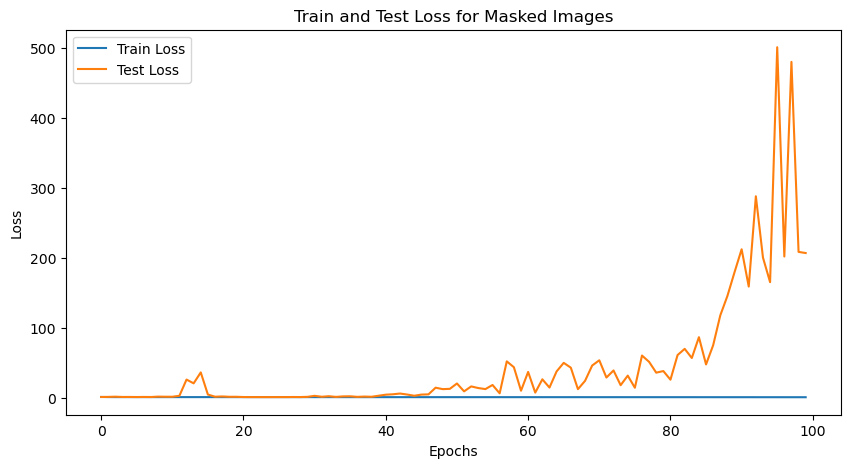

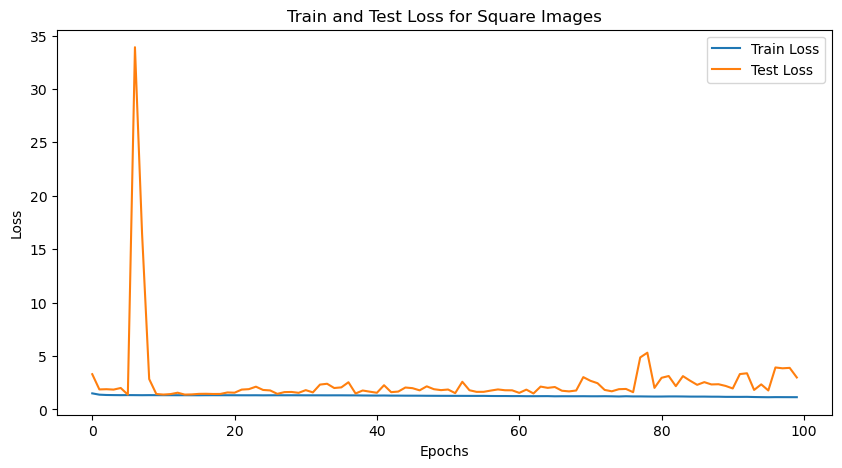

In [12]:
#plot the train and test loss for masked images
plt.figure(figsize=(10,5))
plt.plot(train_loss_msk, label='Train Loss')
plt.plot(test_loss_msk, label='Test Loss')
plt.legend()
plt.title('Train and Test Loss for Masked Images')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#plot the train and test loss for square images
plt.figure(figsize=(10,5))
plt.plot(train_loss_sqr, label='Train Loss')
plt.plot(test_loss_sqr, label='Test Loss')
plt.legend()
plt.title('Train and Test Loss for Square Images')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

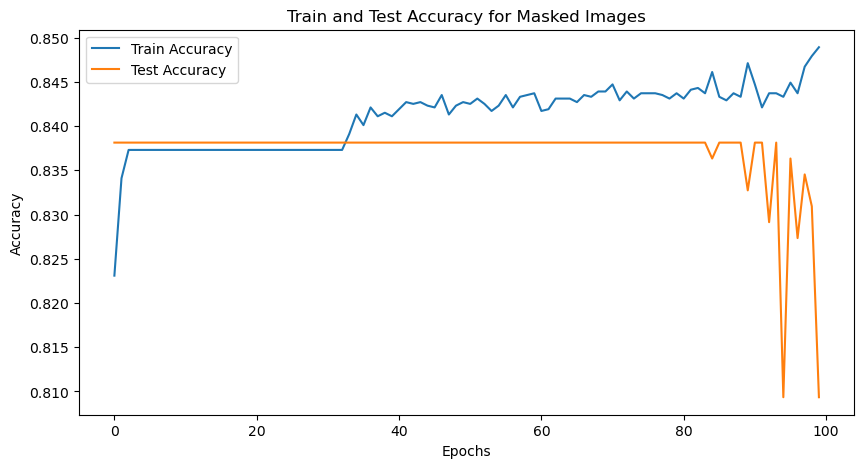

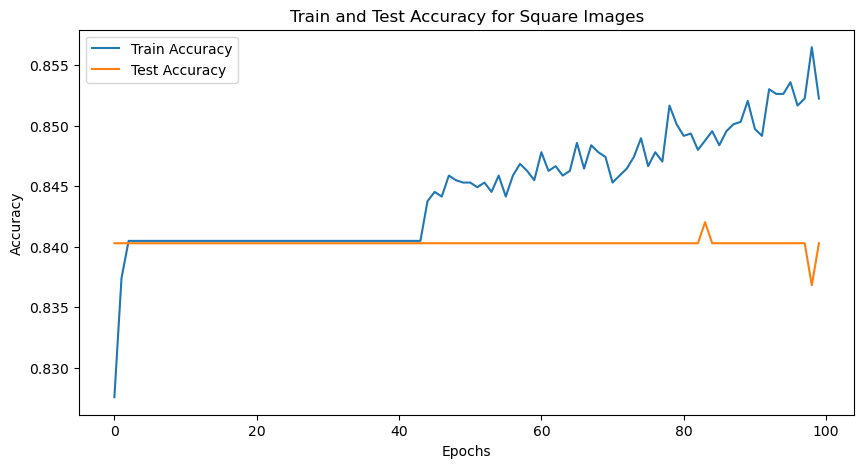

In [14]:
#plot the train and test accuracy for masked images
plt.figure(figsize=(10,5))
plt.plot(train_accuracy_msk, label='Train Accuracy')
plt.plot(test_accuracy_msk, label='Test Accuracy')
plt.legend()
plt.title('Train and Test Accuracy for Masked Images')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

#plot the train and test accuracy for square images
plt.figure(figsize=(10,5))
plt.plot(train_accuracy_sqr, label='Train Accuracy')
plt.plot(test_accuracy_sqr, label='Test Accuracy')
plt.legend()
plt.title('Train and Test Accuracy for Square Images')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


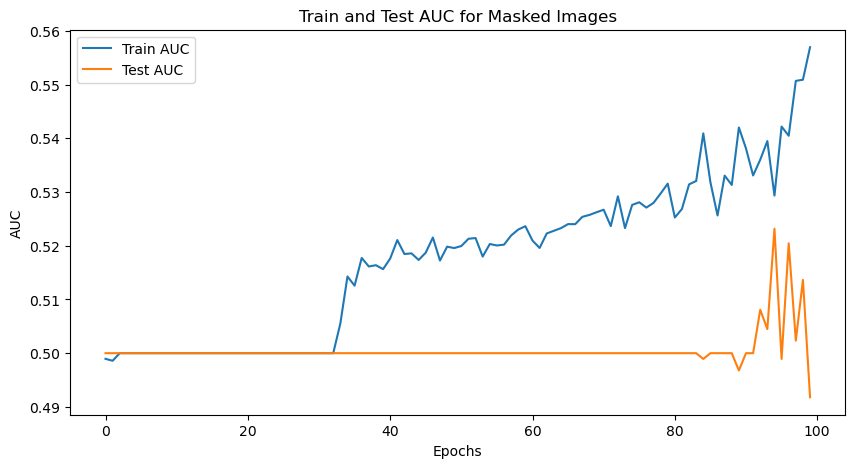

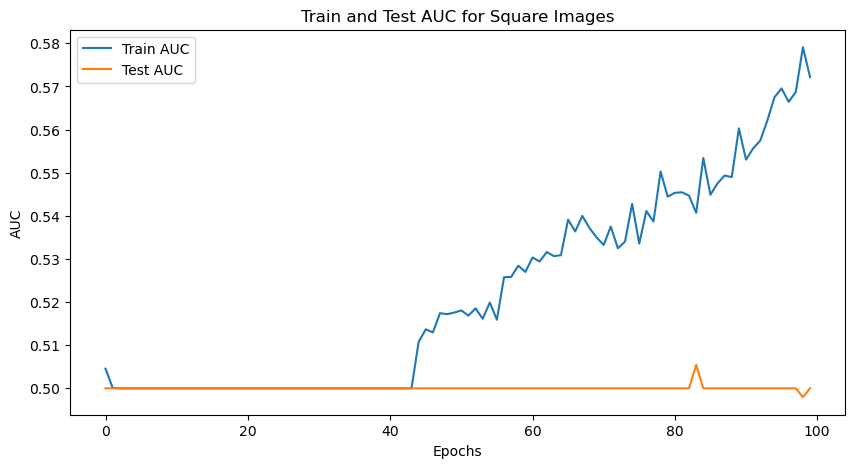

In [15]:
#plot the train and test auc for masked images
plt.figure(figsize=(10,5))
plt.plot(train_auc_msk, label='Train AUC')
plt.plot(test_auc_msk, label='Test AUC')
plt.legend()
plt.title('Train and Test AUC for Masked Images')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.show()

#plot the train and test auc for square images
plt.figure(figsize=(10,5))
plt.plot(train_auc_sqr, label='Train AUC')
plt.plot(test_auc_sqr, label='Test AUC')
plt.legend()
plt.title('Train and Test AUC for Square Images')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.show()


- Check Training/Testing Loop
- Check the data